In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("spotify2023.csv", encoding='latin-1')
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [2]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df["streams"] = df["streams"].str.replace(',', '')
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["streams"].max()

3703895074.0

In [7]:
summary = {
    "Max": df["streams"].max(),
    "Q3": df["streams"].quantile(0.75),
    "Median": df["streams"].median(),
    "Q1": df["streams"].quantile(0.25),
    "Min": df["streams"].min()
}
summary

{'Max': 3703895074.0,
 'Q3': 673869022.0,
 'Median': 290530915.0,
 'Q1': 141636175.0,
 'Min': 2762.0}

<Axes: xlabel='streams', ylabel='Count'>

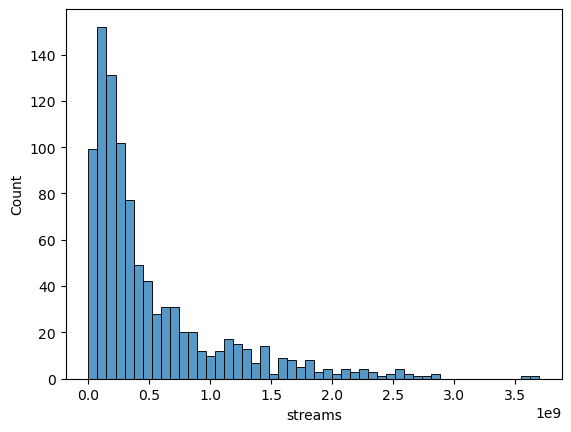

In [11]:
sns.histplot(data=df, x="streams", bins=50)

<AxesSubplot:xlabel='streams'>

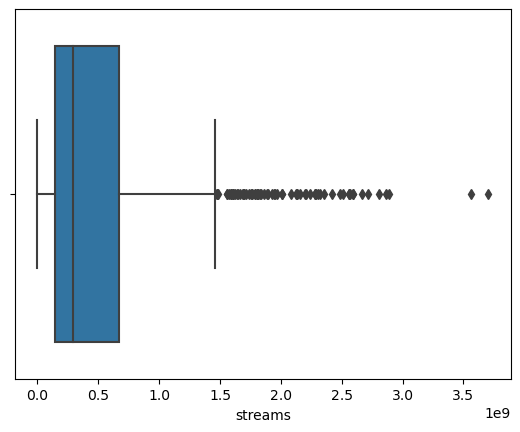

In [8]:
sns.boxplot(data=df, x="streams")

In [5]:
def avg(col):
    Sum=0
    for num in df[col]:
        Sum=Sum+num
    average=Sum/len(df)
    return average

avg('instrumentalness_%')

1.5813221406086044

In [9]:
df["instrumentalness_%"] = df["instrumentalness_%"]
df["instrumentalness_%"] = pd.to_numeric(df["instrumentalness_%"], errors="coerce")
summary = {
    "Max": df["instrumentalness_%"].max(),
    "Q3": df["instrumentalness_%"].quantile(0.75),
    "Median": df["instrumentalness_%"].median(),
    "Q1": df["instrumentalness_%"].quantile(0.25),
    "Min": df["instrumentalness_%"].min()
}
summary

{'Max': 91, 'Q3': 0.0, 'Median': 0.0, 'Q1': 0.0, 'Min': 0}

<AxesSubplot:xlabel='instrumentalness_%', ylabel='Count'>

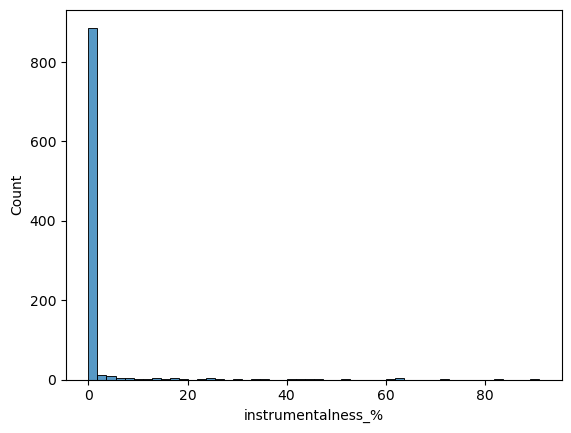

In [10]:
sns.histplot(data=df, x="instrumentalness_%", bins=50)

<AxesSubplot:xlabel='instrumentalness_%'>

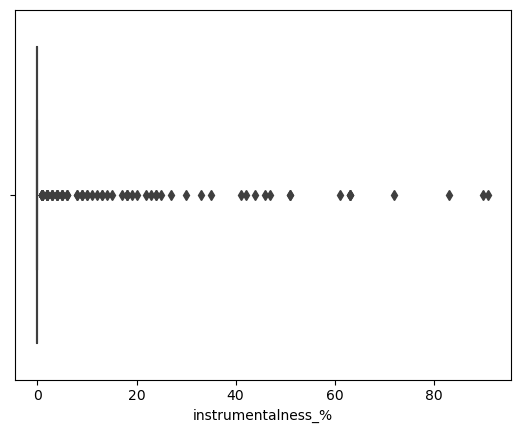

In [11]:
sns.boxplot(data=df, x="instrumentalness_%")

In [3]:
df_winterspring=df[df['released_month']<=6]
df_summerfall=df[df['released_month']>6]

def overlayHistograms(bottom, top, x, bins):
    sns.histplot(data=bottom, x=x, bins=bins, color='#FFBB00')
    sns.histplot(data=top, x=x, bins=bins, color='#BB89EF')

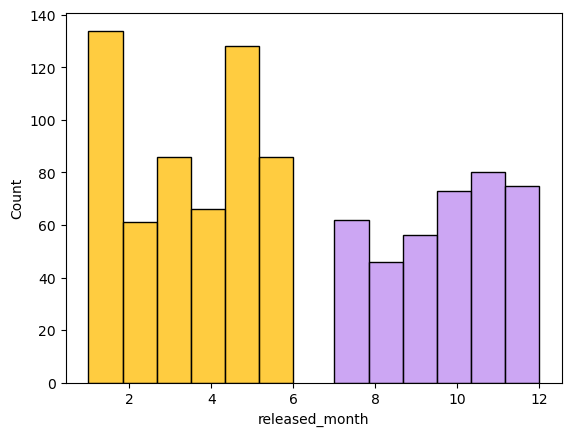

In [4]:
overlayHistograms(df_winterspring, df_summerfall, "released_month", 6)

In [6]:
df_major = df[df["mode"] == "Major"]
df_major.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24


In [8]:
df_minor = df[df["mode"] == "Minor"]
df_minor.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438,41,...,83,F#,Minor,57,56,72,23,0,27,5


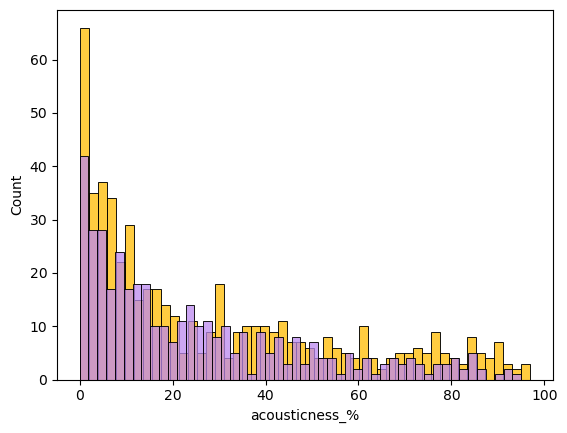

In [13]:
def overlayHistograms(bottom, top, x, bins):
    sns.histplot(data=bottom, x=x, bins=bins, color='#FFBB00')
    sns.histplot(data=top, x=x, bins=bins, color='#BB89EF')

overlayHistograms(df_major, df_minor, "acousticness_%", 50)